A regression analysis to examine the factors that 
significantly affect the price of house using the house data

Let us import relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Loading our dataset into the notebook

In [3]:
House_data = pd.read_csv("/Users/user/Desktop/Python project/house.csv")
House_data.head()

,MLS#,Location,Price,Bedrooms,Bathrooms,SQFT,Price/SQFT,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale


Eploring the dataset

In [4]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MLS#        781 non-null    int64  
 1   Location    781 non-null    object 
 2   Price       781 non-null    int64  
 3   Bedrooms    781 non-null    int64  
 4   Bathrooms   781 non-null    int64  
 5   SQFT        781 non-null    int64  
 6   Price/SQFT  781 non-null    float64
 7   Status      781 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 48.9+ KB


In [5]:
House_data

,MLS#,Location,Price,Bedrooms,Bathrooms,SQFT,Price/SQFT,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale
...,...,...,...,...,...,...,...,...
776,154562,Paso Robles,319900,3,3,1605,199.31,Regular
777,154565,Paso Robles,495000,3,2,1877,263.72,Regular
778,154566,San Luis Obispo,372000,3,2,1104,336.96,Foreclosure
779,154575,Arroyo Grande,589000,3,2,1975,298.23,Regular


In [6]:
#House_data.Status = pd.DataFrame({'Status': ['Short Sale' ==1, 'Regular'==2, 'Foreclosure'==3]})

#Status_Cat.Status.astype('category').cat.codes


In [7]:
House_data

,MLS#,Location,Price,Bedrooms,Bathrooms,SQFT,Price/SQFT,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale
...,...,...,...,...,...,...,...,...
776,154562,Paso Robles,319900,3,3,1605,199.31,Regular
777,154565,Paso Robles,495000,3,2,1877,263.72,Regular
778,154566,San Luis Obispo,372000,3,2,1104,336.96,Foreclosure
779,154575,Arroyo Grande,589000,3,2,1975,298.23,Regular


Dropping Columns that are not relevant for the Regression analysis.

In [8]:
House_data = House_data.drop(columns=['MLS#', 'Location','Status'], axis=1)
House_data

,Price,Bedrooms,Bathrooms,SQFT,Price/SQFT
0,795000,3,3,2371,335.30
1,399000,4,3,2818,141.59
2,545000,4,3,3032,179.75
3,909000,4,4,3540,256.78
4,109900,3,1,1249,87.99
...,...,...,...,...,...
776,319900,3,3,1605,199.31
777,495000,3,2,1877,263.72
778,372000,3,2,1104,336.96
779,589000,3,2,1975,298.23


Lets Check for Missing Data

In [9]:
House_data.isna().sum()

Price         0
Bedrooms      0
Bathrooms     0
SQFT          0
Price/SQFT    0
dtype: int64

There are no missing data. We will now visualise the relationship between price and the other variables

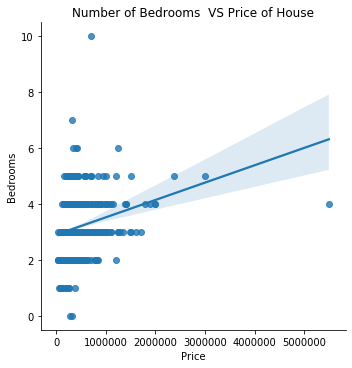

In [10]:
fig=sbn.lmplot(x='Price',y='Bedrooms',data=House_data)
plt.title("Number of Bedrooms  VS Price of House")
plt.show()

The graph above shows that the number of bedrooms in a house relatively affect its price

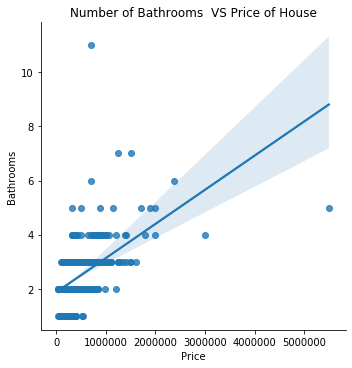

In [11]:
fig=sbn.lmplot(x='Price',y='Bathrooms',data=House_data)
plt.title("Number of Bathrooms  VS Price of House")
plt.show()

The graph above shows that the number of bathrooms in a house affect the price

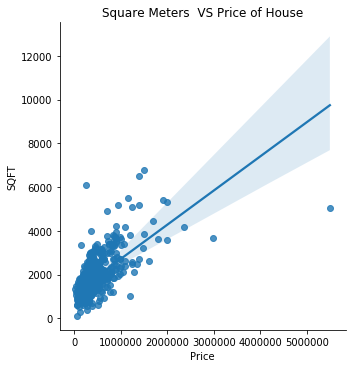

In [12]:
fig=sbn.lmplot(x='Price',y='SQFT',data=House_data)
plt.title("Square Meters  VS Price of House")
plt.show()

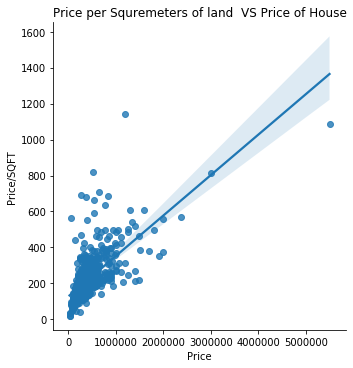

In [13]:
fig=sbn.lmplot(x='Price',y='Price/SQFT',data=House_data)
plt.title("Price per Squremeters of land  VS Price of House")
plt.show()

The graph above shows that the size of the square meters occupied by a house also affects its price

Checking for the correlation between variables

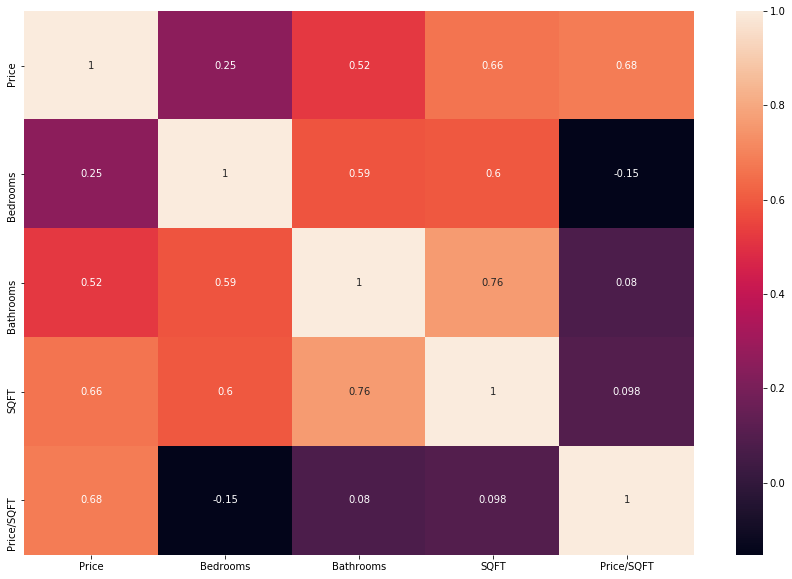

In [14]:
plt.figure(figsize=(15,10))
sbn.heatmap(House_data.corr(), annot=True)

From the heatmap we can tell that the price of a house is majorly dependant on the Square Feet of land area occupied by the house and the price per square feet which is greatly determined by the location of the land.

In [15]:
House_data.describe()

,Price,Bedrooms,Bathrooms,SQFT,Price/SQFT
count,7.810000e+02,781.000000,781.000000,781.000000,781.000000
mean,3.833291e+05,3.142125,2.355954,1755.058899,213.131293
std,3.490381e+05,0.855768,0.846596,819.577603,115.082146
min,2.650000e+04,0.000000,1.000000,120.000000,19.330000
25%,1.990000e+05,3.000000,2.000000,1218.000000,142.140000
50%,2.950000e+05,3.000000,2.000000,1550.000000,188.360000
75%,4.290000e+05,4.000000,3.000000,2032.000000,245.420000
max,5.499000e+06,10.000000,11.000000,6800.000000,1144.640000


Using IQR score to fitter our Outliers

In [16]:
Q1 = House_data.quantile(0.25)
Q3 = House_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Price         230000.00
Bedrooms           1.00
Bathrooms          1.00
SQFT             814.00
Price/SQFT       103.28
dtype: float64


In [17]:
House_data_shaped = House_data[~((House_data < (Q1 - 1.5 * IQR)) |(House_data > (Q3 + 1.5 * IQR))).any(axis=1)]
House_data.shape

(781, 5)

From the above, the seems to be no outliers in the data to remove, thus oour number of rows remain 781

## splitting dataset into train and test

Splitting dataset into x and y variables where the x=independent and y=dependent variable

In [18]:
y = House_data['Price']
x = House_data.drop(columns=['Price'], axis=1)

Converting independent variable from series to numpy array and reshaping it from 1D array to a 2D array

In [19]:
y_1 = y.to_numpy().reshape((-1, 1))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y_1, test_size=.20, random_state=50 )

Fitting the Model

In [21]:
model = LinearRegression()
admin_chance = model.fit(X_train, y_train)

Obtaining r_square(Coefficient of determination)

In [22]:
coef_deter = admin_chance.score(X_train, y_train)
coef_deter

0.8207856433342664

The score shows that the model has 82% chances of predicting the price of a house given the value of the other determining variables

Adjusted r_square

In [23]:
1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.8196275537919999

This shows that even with addition of more variable to the model, the model will still have 82% of predicting the variables

In [24]:
intercept = model.coef_
intercept

array([[-3961.72895907, 16523.5023126 ,   237.47826665,  2036.90706485]])

The Coefficient above shows that there is a positive relationship between the independent variables and the dependent variable aside from 'Bedrooms' which has a negative relationship with the dependent variable. Which goes to say even with high higher or lower number of bedrooms the price of the house may not be affected.

Summarily, it is clear from the analysis that the price of houses are greatly determined by the size of the land they occupy and the price per square meters of the the land in addition to some other factors.

# Predicting Life Expectancy with Regression Analysis

### Reading the data

In [25]:
life_data = pd.read_csv('/Users/user/Desktop/Python project/Life Expectancy Data.csv')
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


The above which originates from W.H.O was meant to evaluate the life expectancy for different countries in years. The data offers a timeframe from 2000 to 2015. 

With the exclution of Country name and Status(either developed or developing) all of the data is numeric. The values are either in years, precentages, millions or dollars in the case of Gross Domestic Product (GDP)

Let us convert the Status column to a categorical veriable

In [26]:
status = pd.get_dummies(life_data.Status)

In [27]:
life_data = pd.concat([life_data, status], axis = 1)

In [28]:
life_data = life_data.drop(['Status'], axis=1) #we drop the 'Status' column

In [29]:
life_data.rename(columns = {'Deloping' : '0', 'Developed' : 1})

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,1,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [30]:
life_data = life_data.drop(['Year'], axis=1)

# Now, lets calculate the mean of each country

In [31]:
life_data = life_data.groupby('Country').mean()
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


# Exploratory Data Analysis

In [32]:
life_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

HIV/AID vs Life Expectancy

Text(0, 0.5, 'Life expectancy')

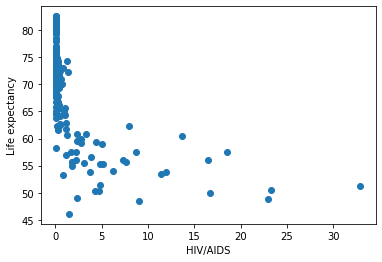

In [33]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Aldult Morality vs Life Expectancy

Text(0, 0.5, 'Life expectancy')

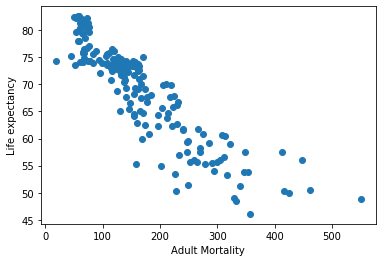

In [34]:
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Life Expectancy vs Infant Death

Text(0, 0.5, 'Life expectancy')

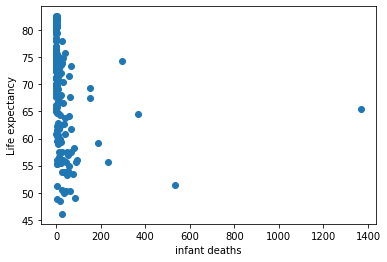

In [35]:
plt.scatter(life_data['infant deaths'], life_data['Life expectancy '])
plt.xlabel('infant deaths')
plt.ylabel('Life expectancy')

Life Expectancy Vs Alcohol

Text(0, 0.5, 'Life expectancy')

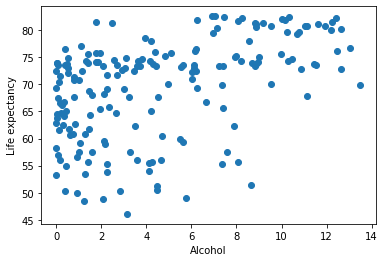

In [36]:
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Percentage Expenditure Vs Life Expectancy

Text(0, 0.5, 'Life expectancy')

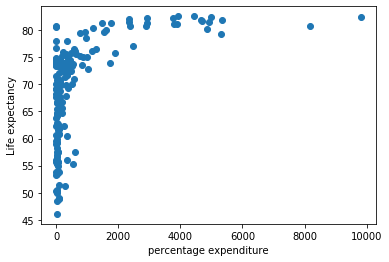

In [37]:
plt.scatter(life_data['percentage expenditure'], life_data['Life expectancy '])
plt.xlabel('percentage expenditure')
plt.ylabel('Life expectancy')

Hepatitis B Vs Life Expecctancy

Text(0, 0.5, 'Life expectancy')

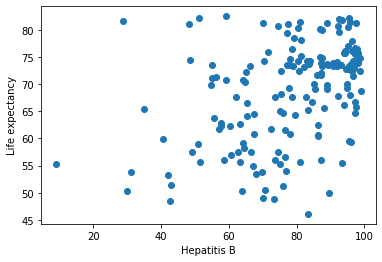

In [38]:
plt.scatter(life_data['Hepatitis B'], life_data['Life expectancy '])
plt.xlabel('Hepatitis B')
plt.ylabel('Life expectancy')

Measles Vs Life Expectancy

Text(0, 0.5, 'Life expectancy')

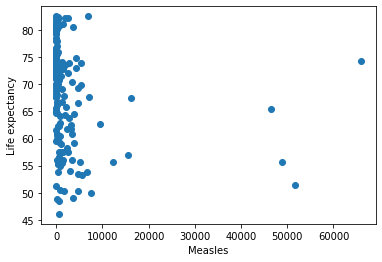

In [39]:
plt.scatter(life_data['Measles '], life_data['Life expectancy '])
plt.xlabel('Measles')
plt.ylabel('Life expectancy')

In [40]:
BMI vs Life Expectancy

SyntaxError: invalid syntax (<ipython-input-40-0a8f1f41d8bc>, line 1)

Text(0, 0.5, 'Life expectancy')

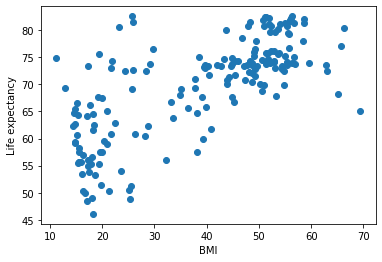

In [41]:
plt.scatter(life_data[' BMI '], life_data['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Under_Five Deaths Vs Life Expectancy

Text(0, 0.5, 'Life expectancy')

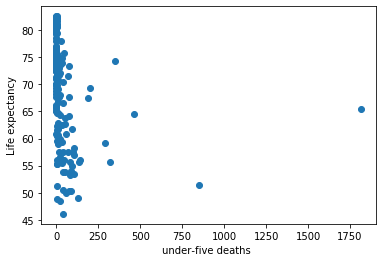

In [42]:
plt.scatter(life_data['under-five deaths '], life_data['Life expectancy '])
plt.xlabel('under-five deaths ')
plt.ylabel('Life expectancy')

Polio Vs Life Expectancy

Text(0, 0.5, 'Life expectancy')

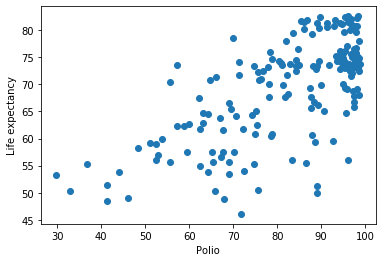

In [43]:
plt.scatter(life_data['Polio'], life_data['Life expectancy '])
plt.xlabel('Polio')
plt.ylabel('Life expectancy')

Total Expenditure Vs Life Expectancy

Text(0, 0.5, 'Life expectancy')

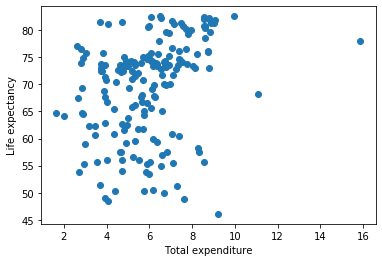

In [44]:
plt.scatter(life_data['Total expenditure'], life_data['Life expectancy '])
plt.xlabel('Total expenditure')
plt.ylabel('Life expectancy')

Diphtheria Vs life Expectancy

Text(0, 0.5, 'Life expectancy')

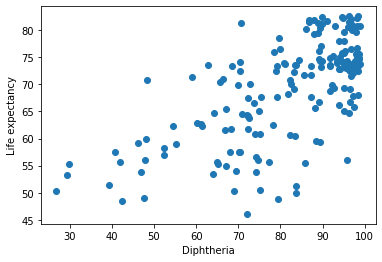

In [45]:
plt.scatter(life_data['Diphtheria '], life_data['Life expectancy '])
plt.xlabel('Diphtheria')
plt.ylabel('Life expectancy')

In [46]:
Population Vs Life Expectancy

SyntaxError: invalid syntax (<ipython-input-46-34583b65d586>, line 1)

Text(0, 0.5, 'Life expectancy')

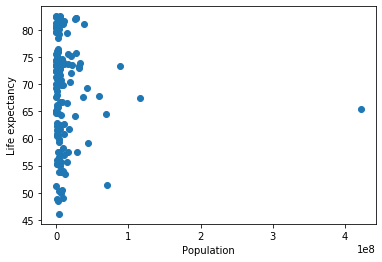

In [47]:
plt.scatter(life_data['Population'], life_data['Life expectancy '])
plt.xlabel('Population')
plt.ylabel('Life expectancy')

GDP Vs Life expectancy

Text(0, 0.5, 'Life expectancy')

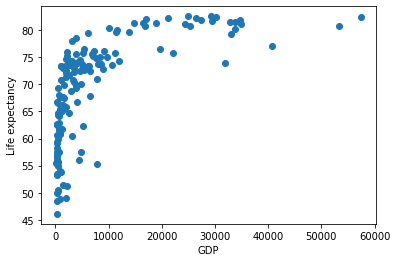

In [48]:
plt.scatter(life_data['GDP'], life_data['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

School Vs Life expectancy

Text(0, 0.5, 'Life expectancy')

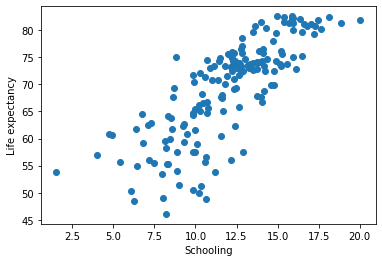

In [49]:
plt.scatter(life_data['Schooling'], life_data['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Income Composition of resources Vs Life Expectancy

Text(0, 0.5, 'Life expectancy')

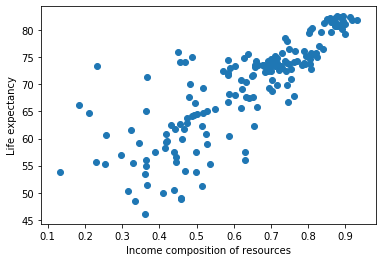

In [50]:
plt.scatter(life_data['Income composition of resources'], life_data['Life expectancy '])
plt.xlabel('Income composition of resources')
plt.ylabel('Life expectancy')

Life Expectancy Vs thinness 1-19years

Text(0, 0.5, 'Life expectancy')

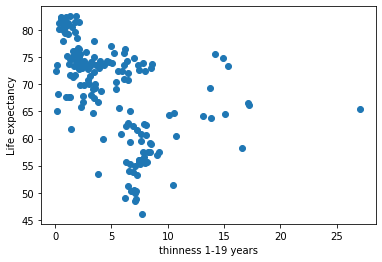

In [51]:
plt.scatter(life_data[' thinness  1-19 years'], life_data['Life expectancy '])
plt.xlabel('thinness 1-19 years')
plt.ylabel('Life expectancy')

Life Expectancy Vs Thinness 5-9 years

Text(0, 0.5, 'Life expectancy')

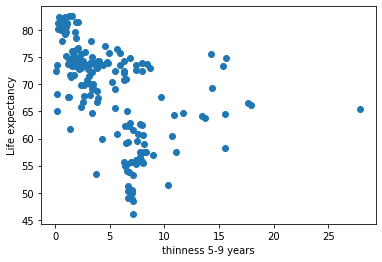

In [52]:
plt.scatter(life_data[' thinness 5-9 years'], life_data['Life expectancy '])
plt.xlabel('thinness 5-9 years')
plt.ylabel('Life expectancy')

from the above, we plot the Life Expectancy against other variables to see if there is any correlation between them.
There seem to be a positive correlation between The Percentage of Healthcare Expenditure, Schooling, GDP and BMI and Life Expectancy,
while there is a negative one between Adult Mortality, AIDS and Life Expectancy,there does not seem to have any correlation between Alcohol, 
under 5 years – old deaths and Life Expectancy.

## Checking for the correlation between variables

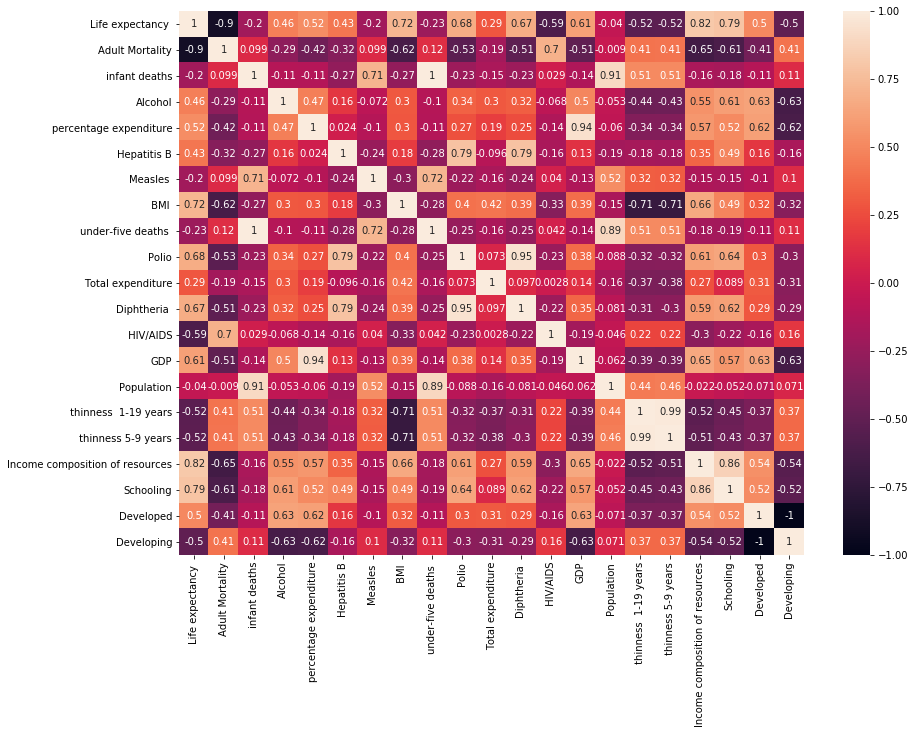

In [53]:
plt.figure(figsize = (14, 10))
sbn.heatmap(life_data.corr(), annot = True)

The visualisation of the correlation matrix with the aid of heatmap above show that there is a very high correlation between thinness of 5-9 year-old and that of 1-19 year-old. Also between population and infant deaths, under 5 deaths, another is between schooling and income composition of resources. On the other hand Life expectancy and Adult Mortality are very highly negatively correlated.

Preprocessing the Data

Cecking for Missing Data

In [54]:
life_data.isna().sum()

Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

Replacing the mising values with the median 

In [55]:
life_data.fillna(value = life_data.median(), inplace = True)
life_data.isnull().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

## Splitting dataset into x and y variables where the x=independent and y=dependent variable

In [56]:
y = life_data['Life expectancy ']
x = life_data.drop(columns=['Life expectancy '], axis=1)

Converting independent variable from series to numpy array and reshaping it from 1D array to a 2D array

In [57]:
y_1 = y.to_numpy().reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(x, y_1, test_size=.20, random_state=50 )

Fitting the Model

In [58]:
model = LinearRegression()
admin_chance = model.fit(X_train, y_train)

Obtaining r_square(Coefficient of determination)

In [59]:
coef_deter = admin_chance.score(X_train, y_train)
coef_deter

0.9268953371174874

The score shows that the model has 93% chances of predicting the Life Expectancy of an individual given the value of the other variables


Adjusted r_square

In [60]:
1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.9159021547291396

The r-square score on training shows that even with addition of more variable to the model, the model will still have 92%  level of accuracy in its predictions

In [61]:
intercept = model.coef_
intercept

array([[-5.29755165e-02,  3.96809133e-02,  9.47090662e-02,
         3.18995380e-04, -3.29614394e-02,  8.06753556e-06,
         5.10133501e-02, -3.70835037e-02, -2.57813923e-02,
         1.35284383e-01,  1.19950045e-01, -1.16942785e-01,
        -2.35069384e-06,  1.95663993e-08, -1.72942764e-01,
         1.88909771e-01,  6.16562522e+00,  2.25265170e-01,
         1.60799085e-01, -1.60799085e-01]])

The Coefficient above shows that there is a positive relationship between the independent variables and the dependent variable aside from 'Adult Mortality, Percentage Expenditure, under-five deaths, Polio,GDP, thinness 1-9year, thinnes 5-9year and income composition of resources' which has a negative relationship with the dependent variable; they may likely not affect the life expectancy of an individual  

In [62]:
y_predict = admin_chance.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model_predict = model.predict(X_test)
print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_predict))
print('R_square score: %.2f' % r2_score(y_test, y_predict))


Coefficients: 
 [[-5.29755165e-02  3.96809133e-02  9.47090662e-02  3.18995380e-04
  -3.29614394e-02  8.06753556e-06  5.10133501e-02 -3.70835037e-02
  -2.57813923e-02  1.35284383e-01  1.19950045e-01 -1.16942785e-01
  -2.35069384e-06  1.95663993e-08 -1.72942764e-01  1.88909771e-01
   6.16562522e+00  2.25265170e-01  1.60799085e-01 -1.60799085e-01]]
Mean squared error: 4.72
Mean absolute error: 1.76
R_square score: 0.92


## Conclusion

With high R-squared of 92% it goes to say that our model has 92% of predicting the life expectancy of an individual. Sometimes the R-squared might be decieving so to get a better model with no overfitting there is the need to check your adjusted R-Squared shows that even with addition of more variable to the model, the model will still have 92% of predicting the response.

# # Hypothesis Testing

H0: There is significance relationship between the Life Expectancy and Alcohol

H1: There is no statistical significance relationship between Life Expectancy and Alcohol



Using Chi-Square Statement 

Loading required libraries

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import chi2

Defining of variables from the dataset

In [65]:
table = life_data[['Life expectancy ', 'Alcohol','Schooling' ]]

In [69]:
table = table.rename(columns={'Life expectancy ': 'LifeExpectancy'})

In [70]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LifeExpectancy  193 non-null    float64
 1   Alcohol         193 non-null    float64
 2   Schooling       193 non-null    float64
dtypes: float64(3)
memory usage: 6.0+ KB


No missing values

In [71]:
stat, p, dof, expected = chi2_contingency(table)

print(expected)
# interpret test-statistic
p_value = 0.95
critical = chi2.ppf(p_value, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (p_value, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - p_value
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[53.7527807   3.43166958  9.23617472]
 [74.56893993  4.76060884 12.81295123]
 [70.19512709  4.48137714 12.06141244]
 [50.82524961  3.24477098  8.73314607]
 [74.33168646  4.74546217 12.7721847 ]
 [80.62773795  5.14741288 13.85401583]
 [71.93689664  4.59257469 12.36069534]
 [90.64350298  5.78683648 15.57499388]
 [88.29612338  5.63697574 15.17165088]
 [67.22939131  4.29203949 11.5518192 ]
 [78.48692668  5.01073982 13.48616683]
 [74.26923714  4.7414753  12.76145422]
 [63.12675419  4.03012011 10.8468757 ]
 [78.86958051  5.0351691  13.55191705]
 [79.43358015  5.0711758  13.64882737]
 [87.8159515   5.60632075 15.08914442]
 [71.19843005  4.54542972 12.2338069 ]
 [54.56054176  3.48323843  9.37496981]
 [62.04427682  3.9610129  10.66087695]
 [68.69216212  4.38542528 11.8031626 ]
 [74.93844298  4.78419855 12.8764418 ]
 [58.96200495  3.76423538 10.13125967]
 [76.68486589  4.89569318 13.17652427]
 [73.6220167   4.70015564 12.65024433]
 [78.8563623   5.03432523 13.54964581]
 [52.83886929  3.37332391

From the above result we can see that there is no significant relationship between the dependent and the independent variables. Thus we reject the Null hypothesis(H0) and accept the Alternative hypothesis which mean there is no significant statistical between Life expectancy and Alcohol consumption.

## Using a two Annova

In [86]:
#perform two-way ANOVA
model = ols('LifeExpectancy  ~  C(Alcohol) + C(Schooling)', data = table).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Alcohol),14918.963362,179.0,1.209753,0.490199
C(Schooling),14009.960434,173.0,1.175444,0.505095
Residual,275.580732,4.0,NaN,NaN


Since the p-values for Alcohol and Schooling are both greater than .05, this means that both factors have no statistically significant effect on Life expecctancy.


We can conclude that the Life expectancy of an individual is not in any way determined by the level of schooling or Alcohol consumption of an individual.